In [2]:
import numpy as np
from math import erf
from math import gamma
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def getNormal(mean, div):
    def f(x):
        return 0.5*(1 + erf( (x - mean)/ (div * 2**0.5) ))
    return f


Exp_P = lambda la, t: np.e**(-la*t)

Phi = lambda x: erf(x/2**0.5)/2

def mystep(x,y, ax=None, where='post', **kwargs):
    assert where in ['post', 'pre']
    x = np.array(x)
    y = np.array(y)
    if where=='post': y_slice = y[:-1]
    if where=='pre': y_slice = y[1:]
    X = np.c_[x[:-1],x[1:],x[1:]]
    Y = np.c_[y_slice, y_slice, np.zeros_like(x[:-1])*np.nan]
    if not ax: ax=plt.gca()
    return ax.plot(X.flatten(), Y.flatten(), **kwargs)


Задание 1.

N(t) [45, 26, 13, 5, 2, 2, 1, 0]
Avg T 20.88888888888889
Avg T^2 613.3333333333334
P(t) [1.0, 0.5777777777777777, 0.28888888888888886, 0.1111111111111111, 0.044444444444444446, 0.044444444444444446, 0.022222222222222223]
Frequency(t) [0.042222222222222223, 0.028888888888888888, 0.017777777777777778, 0.006666666666666667, 0.0, 0.0022222222222222222, 0.0022222222222222222]
Intesity [0.05352112676056338, 0.06666666666666667, 0.08888888888888889, 0.08571428571428572, 0.0, 0.06666666666666667, 0.2]
Mu: 0.006317877568782535, Alpha: 1.608317551417309


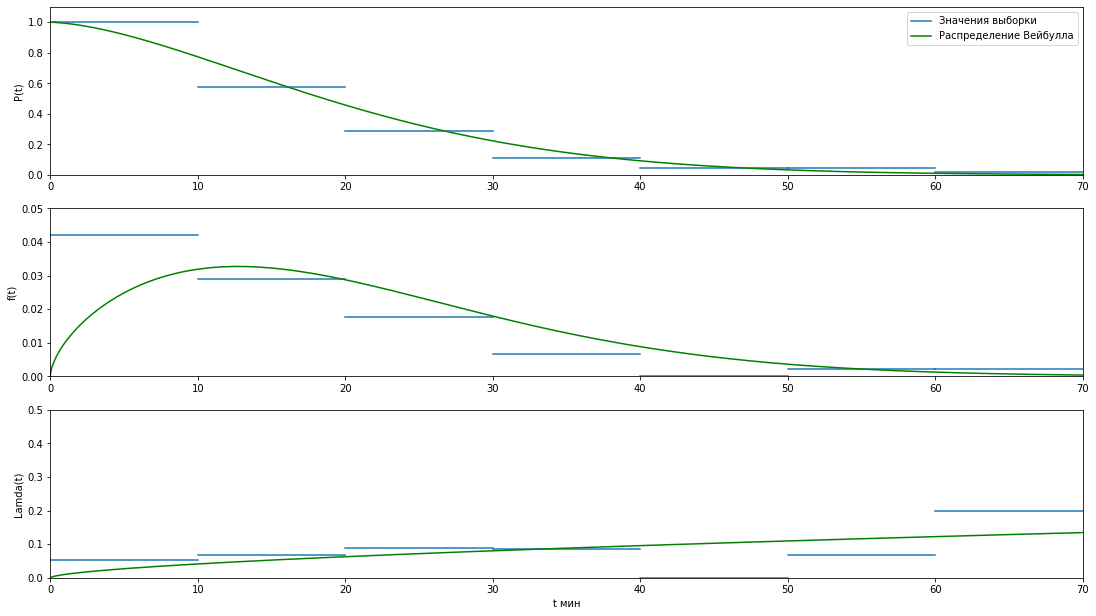

In [3]:
N = 45
dt = 10
failture_t = [19, 13, 8, 3, 0, 1, 1]
length = len(failture_t)
N_list = [N]*(length + 1)

for i in range(length):
    N_list[i+1] = N_list[i] - failture_t[i]

print("N(t)",N_list)
fig, ax = plt.subplots(3)
fig.set_size_inches(18.5, 10.5)
ax[2].set_xlabel("t мин")
[ ax[i].set_xlim(0, 70) for i in range(3) ]

x = [0, 10, 20, 30, 40 , 50, 60, 70]

mean  = (np.array([0] + failture_t) * np.array(x)).sum()/N
mean2 = (np.array([0] + failture_t) * (np.array(x)**2)).sum()/N
print("Avg T", mean)
print("Avg T^2", mean2)

#print(np.array([0] + failture_t) * np.array(x), np.array([0] + failture_t) * (np.array(x)**2))
P = [1]*length
for i in range(length):
    P[i] = (N_list[i]/N)
print("P(t)", P)

freq = [0]*length
for i in range(length):
    freq[i] = (failture_t[i]/(N*dt))
print("Frequency(t)", freq)

la = [0]*length
for i in range(length):
    la[i] = (failture_t[i]/(0.5*(N_list[i] + N_list[i + 1])*dt))
print("Intesity", la)

ax[0].set_ylabel("P(t)")
#ax[0].step(x, [P[0]] + P, linewidth=2.5, label="Значения выборки")
mystep(x,  P + [0], ax=ax[0], label="Значения выборки")
ax[0].set_ylim(0, 1.1)

ax[1].set_ylabel("f(t)")
#ax[1].step(x, [freq[0]] + freq, linewidth=2.5)
mystep(x,   freq + [0], ax=ax[1])
ax[1].set_ylim(0, 0.05)

ax[2].set_ylabel("Lamda(t)")
#ax[2].step(x, [la[0]] + la, linewidth=2.5)
mystep(x,   la + [0], ax=ax[2])
ax[2].set_ylim(0, 0.5)

alpha = fsolve(lambda alp: mean2/mean**2 - gamma(1 + 2/alp)/(gamma(1 + 1/alp)**2), 1)[0]
lamb = mean / gamma(1 + 1/alpha)
mu = (1/lamb)**(alpha)
print("Mu: {}, Alpha: {}".format(mu, alpha))
get_f  = lambda t : (np.e**(-mu*t**alpha))*mu*alpha*t**(alpha-1)
get_P  = lambda t : (np.e**(-mu*t**alpha))
get_la = lambda t : mu * alpha * t**(alpha - 1)
weib_x = np.linspace(0, 70, 7000)
ax[0].plot(weib_x, get_P(weib_x), "g", label="Распределение Вейбулла")
ax[1].plot(weib_x, get_f(weib_x), "g")
ax[2].plot(weib_x, get_la(weib_x), "g")

ax[0].legend(loc='upper right')

plt.show()


Задание 3.

In [4]:

la = 1e-6
t = 1e4



P = [Exp_P(la, t), Exp_P(la, 2*t), Exp_P(la, 2*t)/Exp_P(la, t)] 
print(P)

[0.9900498337491681, 0.9801986733067553, 0.990049833749168]


Задание 4.

In [5]:
mu = 1e-4
alpha = 0.4
t = 300


mu*alpha*t**(alpha - 1)

1.305531149814636e-06

Задание 5.

In [6]:
F  = lambda t, k: 2*np.e**(-3*k*t) - 3*np.e**(-2*k*t) + 1
1 - F(6, 0.1)


0.5729848592934332

Задание 6.

In [17]:
G = 0.7e11


J = lambda d : (np.pi * d**4) / 32

#Solution
x = 0.020231

M = [40e3, 3e3]
Teta = [60, 0.01]
G = 0.7e11

Phi((Teta[0]-M[0]/(J(x)*G)) / (Teta[1]**2 +  (M[1]/(J(x)*G))**2))


0.49903239678678163

Задание 7

In [19]:
u0 = 2.3
u_lim = 10.4
u_max = u_lim - u0
y_mean = 2.8e-2
y_div  = 3.41e-3



P = [0.8, 0.99, 0.999]

normalize = lambda t: (u_max - y_mean * t) / (t*y_div)
get_t     = lambda c: u_max/(c*y_div + y_mean)

ret_value = np.array([0.85, 2.34, 3.1])

0.5 + Phi(normalize(200))
print("T: ",get_t(ret_value))


T:  [262.14864799 225.12882372 210.00233336]


Задание 8.

In [9]:
P1 = 0.9
P2 = 0.8
(1 - (1 - P1)**3)*(1 - (1 - P2)**3)

0.991008

Задание 9.

In [10]:
t = 100
la = 1e-4
Nv2 = (7200, 2000)
u = 0.1e-5
alpha = 1.5



NoVar = getNormal(Nv2[0], Nv2[1])

first = Exp_P(la, t)
second = 0.5 - Phi((100 - Nv2[0])/ Nv2[1])
third = np.e**(-u*(t**alpha))
first*second*third




0.9888697703604341